<a href="https://colab.research.google.com/github/BrunoBVR/DL-with-python/blob/main/3p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bruno Vieira Ribeiro

# Classifying newswires: a multiclass classification example

---

## Loading the Reuters dataset

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


As with the IMDB dataset, the argument `num_words=10000` restricts the data to the 10,000 most frequently occurring words found in the data.

You have 8,982 training examples and 2,246 test examples:

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

Each sample is a list of integers (word indices):

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decoding the samples

In [6]:
word_index = reuters.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# Note that the indices are offset by 3 because 0, 1, and 2 are reserved
# indices for “padding,” “start of sequence,” and “unknown.”
decoded_newswire = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

565248/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Label associated with an example is an integer between 0 and 45 (a topic index):

In [8]:
train_labels[10]

3

## Preparing the data

Vectorize the data:

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### Vectorizing the labels

One-hot encoding:

In [11]:
def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [12]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

We could have done this using **Keras** built-in function:

In [13]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building the network

In [14]:
from keras import models, layers

model = models.Sequential()

# Input layer
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(46, activation='softmax'))

## Compiling the model

In [16]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating the model

In [17]:
# Set aside 1000 samples for validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the model

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 56ms/step - loss: 2.6842 - accuracy: 0.5202 - val_loss: 1.7757 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4351 - accuracy: 0.7035 - val_loss: 1.2967 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0530 - accuracy: 0.7803 - val_loss: 1.1096 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8240 - accuracy: 0.8286 - val_loss: 1.0075 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6535 - accuracy: 0.8668 - val_loss: 0.9485 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5226 - accuracy: 0.8948 - val_loss: 0.9019 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4213 - accuracy: 0.9132 - val_loss: 0.8986 - val_accuracy: 0.8030
Epoch 8/20
16

## Plotting losses

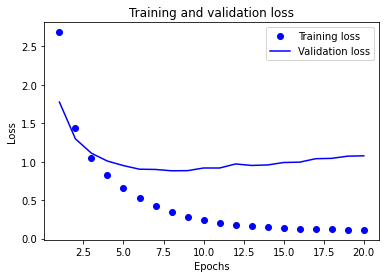

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

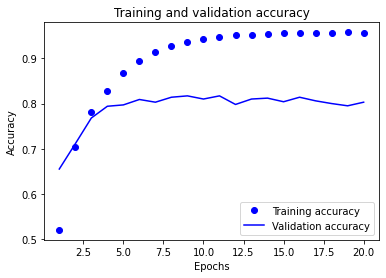

In [20]:
plt.clf() # Clears figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

We see some overfitting after 9 epochs. Let's retrain a new network from scratch for nine epochs and evaluate it on the test set:

## Retrain and evaluate with test set

In [22]:
model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 2.6363 - accuracy: 0.5272 - val_loss: 1.7139 - val_accuracy: 0.6560
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.3953 - accuracy: 0.7122 - val_loss: 1.2783 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 42ms/step - loss: 1.0325 - accuracy: 0.7766 - val_loss: 1.1453 - val_accuracy: 0.7370
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8141 - accuracy: 0.8276 - val_loss: 1.0429 - val_accuracy: 0.7640
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6573 - accuracy: 0.8628 - val_loss: 0.9693 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 0.5285 - accuracy: 0.8921 - val_loss: 0.9302 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 0.4304 - accuracy: 0.9132 - val_loss: 0.9140 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [23]:
results

[1.0250405073165894, 0.7818343639373779]

## Compare to random baseline

In [24]:
import copy

test_labels_copy = copy.copy(test_labels)

np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.20035618878005343

A random model would produce a 20% accuracy.

## Generating prediction on new data

In [25]:
predictions = model.predict(x_test)

Each entry in `predictions` is a vector  of length 46:

In [26]:
predictions[0].shape

(46,)

The coefficients in each vector sum to 1:

In [27]:
np.sum(predictions[0])

0.99999994

The largest entry is the predicted class (class with highest probability):

In [28]:
np.argmax(predictions[0])

3